In [1]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy.stats import norm,beta

parameter: 0.3989422804014327
estimation: 0.39096192774874605


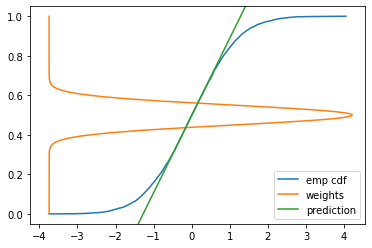

In [2]:
size=10000
samples=np.sort(norm.rvs(size=size))
cdf=np.linspace(0,1,size)
x0=0
par=norm.pdf(x=x0)

X=sm.add_constant(samples)
y=cdf
weights=beta.pdf(x=cdf,a=50,b=50)
fit=sm.WLS(y,X,weights).fit()
params=fit.params
est=params[1]
print('parameter:',par)
print('estimation:',est)

plt.plot(samples,cdf,label='emp cdf')
plt.plot(weights+samples.min(),cdf,label='weights')
plt.plot(samples,fit.model.predict(params),label='prediction')
plt.xlim([samples.min()-0.5,samples.max()+0.5])
plt.ylim([0-0.05,1+0.05])
plt.legend()
plt.show()